In [1]:
# Program to find measure of expected significance as a function
# of a cut value x_cut applied to measured variable x.
# G. Cowan / RHUL Physics / December 2022

# Full version containing exercise solutions

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

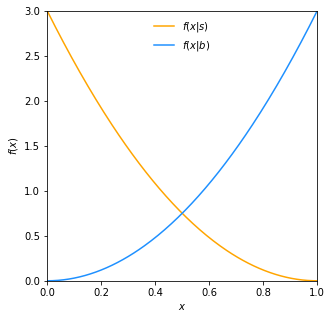

In [2]:
#  Plot the pdfs
def f_s(x):
    return 3.*(1-x)**2
def f_b(x):
    return 3.*x**2
x = np.linspace(0., 1., 201)
fs = f_s(x)
fb = f_b(x)
fig = plt.figure(figsize=(5,5))
plt.plot(x, fs, color='orange', label=r'$f(x|s)$')
plt.plot(x, fb, color='dodgerblue', label=r'$f(x|b)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0., 1.)
plt.ylim(0., 3.)
plt.legend(loc='upper center', frameon=False)
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
plt.show()

In [3]:
# Find x_cut for size alpha = 0.05
alpha = 0.05
xc05 = alpha**(1./3.)
print("For alpha=0.05, x_cut = {:.3f}".format(xc05))

For alpha=0.05, x_cut = 0.368


In [4]:
# Find power with respect to s for this x_cut
power = 1. - (1. - xc05)**3
print("Power = {:.3f}".format(power), "\n")

Power = 0.748 



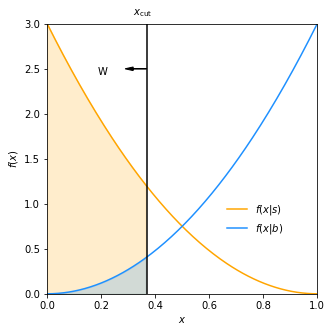

In [5]:
# Plot critical region
fig = plt.figure(figsize=(5,5))
plt.plot(x, fs, color='orange', label=r'$f(x|s)$')
plt.plot(x, fb, color='dodgerblue', label=r'$f(x|b)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.xlim(0., 1.)
plt.ylim(0., 3.)
plt.legend(loc=(0.65,0.2), frameon=False)
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
plt.axvline(xc05, color="black")
plt.fill_between(x=x, y1= fs, where=x<xc05, color= "orange", alpha=0.2)
plt.fill_between(x=x, y1= fb, where=x<xc05, color= "dodgerblue",alpha=0.2)
plt.arrow(xc05, 2.5, -0.05, 0., head_width=0.04, head_length=0.03, color="black")
plt.text(xc05-0.18, 2.44, "W")
plt.text(xc05-0.05, 3.1, r'$x_{\rm cut}$')
plt.show()

In [6]:
# Calculate s, b, signficance for x_cut = 0.1
s_tot = 10.
b_tot = 100.
x_cut = 0.1
eff_sig = 1. - (1.-x_cut)**3
eff_bkg = x_cut**3
s = s_tot*eff_sig
b = b_tot*eff_bkg
print("Expected numbers of events for s_tot=10, b_tot=100:")
print("s = {:.3f}".format(s))
print("b = {:.3f}".format(b), "\n")

Expected numbers of events for s_tot=10, b_tot=100:
s = 2.710
b = 0.100 



In [7]:
#  Find s, b, significance versus x_cut
x_cut = np.linspace(0.005, 1., 200)
eff_sig = 1. - (1.-x_cut)**3
eff_bkg = x_cut**3

s = s_tot*eff_sig
b = b_tot*eff_bkg
s_over_rootb = s / np.sqrt(b)
Z_A = np.sqrt( 2.*((s+b)*np.log(1. + s/b) - s))

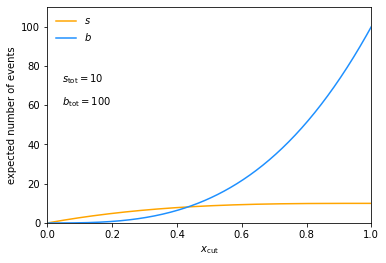

In [8]:
# Plot s, b versus x_cut
fig = plt.figure(figsize=(6,4))
plt.plot(x_cut, s, color='orange', label=r'$s$')
plt.plot(x_cut, b, color='dodgerblue', label=r'$b$')
plt.xlabel(r'$x_{\rm cut}$')
plt.ylabel(r'expected number of events')
plt.xlim(0., 1.)
plt.ylim(0., 110.)
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
plt.text(0.045, 72, r'$s_{\rm tot} = 10$')
plt.text(0.045, 60, r'$b_{\rm tot} = 100$')
plt.legend(loc='upper left', frameon=False)
plt.show()

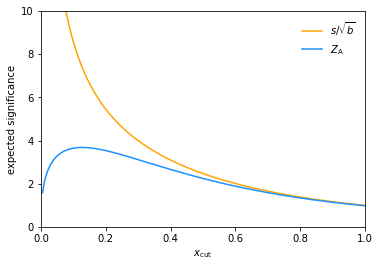

In [9]:
# Plot Z_A versus x_cut
fig = plt.figure(figsize=(6,4))
plt.plot(x_cut, s_over_rootb, color='orange', label=r'$s/\sqrt{b}$')
plt.plot(x_cut, Z_A, color='dodgerblue', label=r'$Z_{\rm A}$')
plt.xlabel(r'$x_{\rm cut}$')
plt.ylabel(r'expected significance')
plt.xlim(0., 1.)
plt.ylim(0., 10.)
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
plt.legend(loc='upper right', frameon=False)
plt.show()

In [10]:
# Find x_cut that maximizes Z_A
i_opt = np.argmax(Z_A)
Z_A_max = Z_A[i_opt]
x_cut_opt = x_cut[i_opt]
print("For no uncertainty in b,")
print("maximum Z_A at x_cut = {:.3f}".format(x_cut_opt))
print("Z_A = {:.3f}".format(Z_A_max), "\n")

For no uncertainty in b,
maximum Z_A at x_cut = 0.125
Z_A = 3.684 



For sigma_b = 1.0,
maximum Z_A at x_cut = 0.335
Z_A = 2.505 



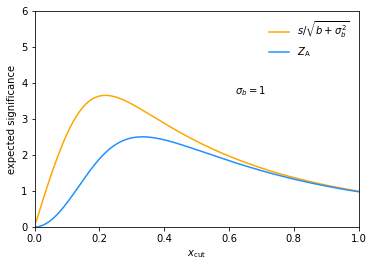

In [11]:
# For case where b is uncertain
sigb = 1.
u = (s+b)*(b + sigb*sigb) / (b*b + (s+b)*sigb*sigb)
v = b/sigb
w = 1. + sigb*sigb*s/(b*(b + sigb*sigb))
Z_A_naive = s / np.sqrt(sigb**2 + b)
Z_A_sigb = np.sqrt( 2.*((s+b)*np.log(u) - v*v*np.log(w)))
i_opt = np.argmax(Z_A_sigb)
Z_A_max = Z_A_sigb[i_opt]
x_cut_opt = x_cut[i_opt]
print("For sigma_b = 1.0,")
print("maximum Z_A at x_cut = {:.3f}".format(x_cut_opt))
print("Z_A = {:.3f}".format(Z_A_max), "\n")

fig = plt.figure(figsize=(6,4))
plt.plot(x_cut, Z_A_naive, color='orange', label=r'$s/\sqrt{b + \sigma_b^2}$')
plt.plot(x_cut, Z_A_sigb, color='dodgerblue', label=r'$Z_{\rm A}$')
plt.xlabel(r'$x_{\rm cut}$')
plt.ylabel(r'expected significance')
plt.xlim(0., 1.)
plt.ylim(0., 6.)
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
plt.text(0.62, 3.7, r'$\sigma_b = 1$')
plt.legend(loc='upper right', frameon=False)
plt.show()